# PARCIAL 1

paola andrea ladino valbuena
2025

# ejercicio 1

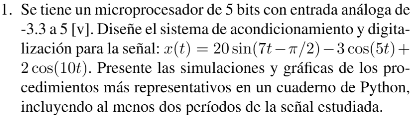


**solucion teorica: **

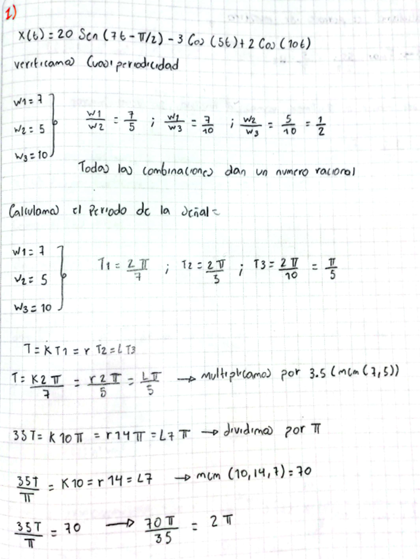
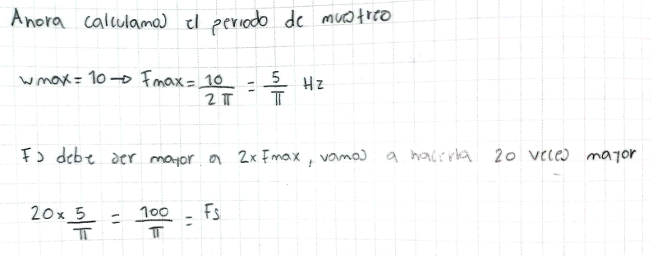

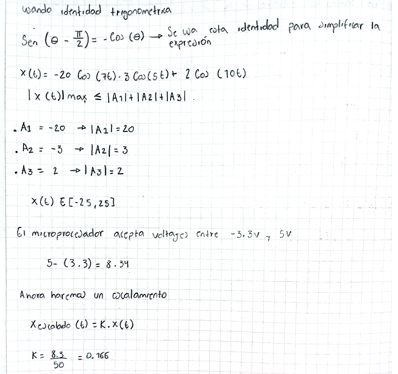

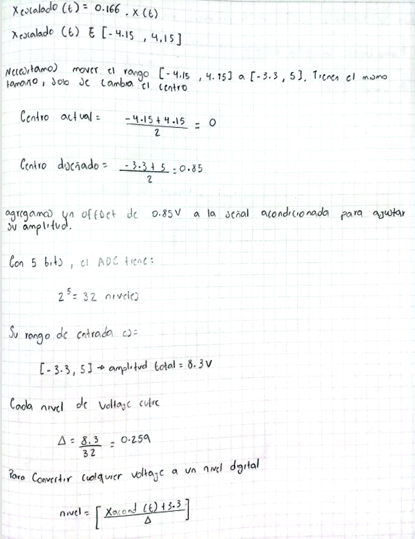

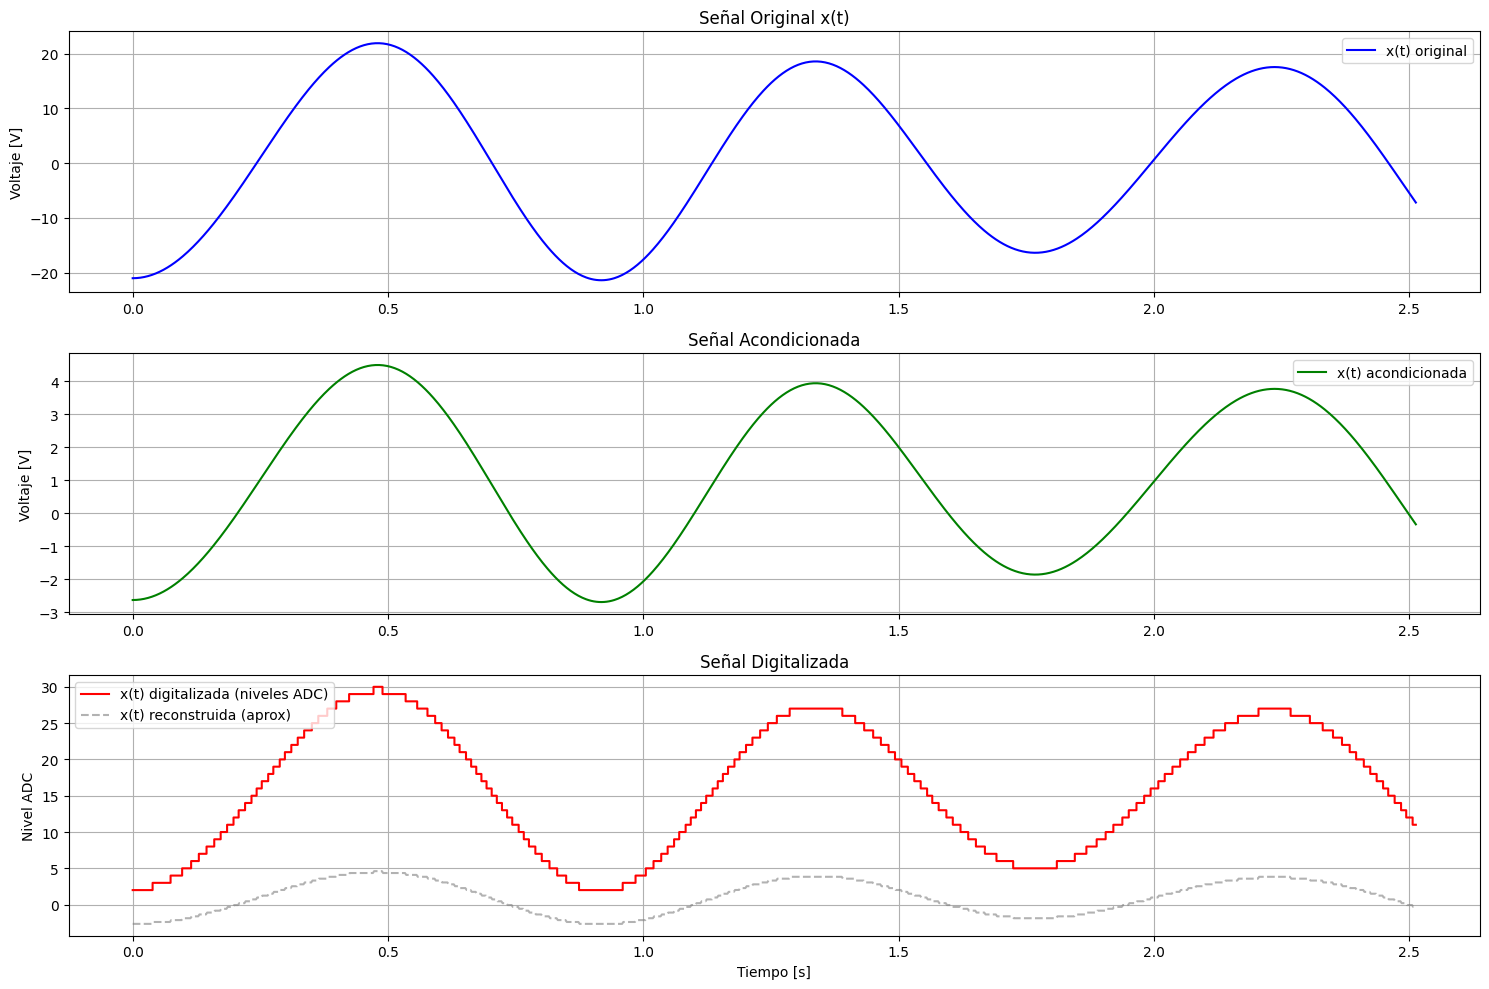

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. Tiempo de simulación
# =====================================

# La frecuencia angular más baja en la señal es 5 rad/s, entonces su periodo es T = 2π / 5
# Simularemos dos periodos de la señal más lenta para ver al menos dos ciclos completos
T = 2 * np.pi / 5

# Creamos un vector de tiempo entre 0 y 2T con 1000 muestras (suficientes para buena resolución)
t = np.linspace(0, 2*T, 1000)

# =====================================
# 2. Definición de la señal original
# =====================================

# La señal x(t) es una combinación de:
# - una senoidal de 7 rad/s con desfase -π/2
# - una cosenoidal de 5 rad/s
# - una cosenoidal de 10 rad/s
x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# =====================================
# 3. Acondicionamiento de la señal
# =====================================

# Para poder digitalizarla, se escala y se le suma un offset para que quede dentro de un rango válido
k = 8.3 / 50        # Factor de escalamiento (reduce amplitud de la señal original)
offset = 0.85       # Desplazamiento vertical (para centrarla en el rango del ADC)

# Se aplica el acondicionamiento: x_acond es la señal que se enviaría al conversor A/D
x_acond = k * x + offset

# =====================================
# 4. Digitalización (Conversión A/D)
# =====================================

# Se simula un ADC de 5 bits → 2⁵ = 32 niveles posibles
bits = 5
N_levels = 2 ** bits

# Rango de entrada del ADC: de -3.3 V a 5 V
V_min, V_max = -3.3, 5

# Se calcula el tamaño de cada nivel de cuantización
delta = (V_max - V_min) / N_levels

# Se digitaliza la señal: se asigna un número entero a cada valor de voltaje
# Se usa floor() para quedarnos con el nivel inferior
x_digital = np.floor((x_acond - V_min) / delta)

# Aseguramos que los valores estén dentro del rango válido [0, 31]
x_digital = np.clip(x_digital, 0, N_levels - 1)

# Para fines de visualización, reconstruimos un valor de voltaje aproximado
# Se toma el valor central de cada nivel
x_rec = x_digital * delta + V_min + delta / 2

# =====================================
# 5. Gráficas para visualizar el proceso
# =====================================

plt.figure(figsize=(15, 10))  # Tamaño de la figura en pulgadas

# -------- Señal original --------
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t) original', color='blue')
plt.title('Señal Original x(t)')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()

# -------- Señal acondicionada --------
plt.subplot(3, 1, 2)
plt.plot(t, x_acond, label='x(t) acondicionada', color='green')
plt.title('Señal Acondicionada')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()

# -------- Señal digitalizada --------
plt.subplot(3, 1, 3)

# x_digital se grafica como escalones (niveles del ADC)
plt.step(t, x_digital, label='x(t) digitalizada (niveles ADC)', where='mid', color='red')

# También se grafica la señal reconstruida (en voltaje) como línea discontinua
plt.plot(t, x_rec, '--', label='x(t) reconstruida (aprox)', color='gray', alpha=0.6)

plt.title('Señal Digitalizada')
plt.ylabel('Nivel ADC')
plt.xlabel('Tiempo [s]')
plt.grid()
plt.legend()

# Ajusta automáticamente los subplots para que no se encimen
plt.tight_layout()

# Muestra la figura
plt.show()


discusion:

En este código, digitalizamos una onda. Primero, la "arreglamos" (acondicionamiento) para que encaje bien en el convertidor. Luego, el convertidor (uno de 5 bits) la divide en 32 niveles y le asigna un número a cada parte. Esto la hace digital, con "saltos" en lugar de ser suave.

# ejercicio 2

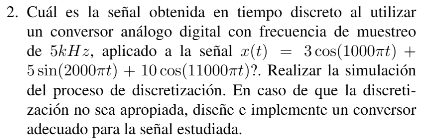

**solucion teorica:**

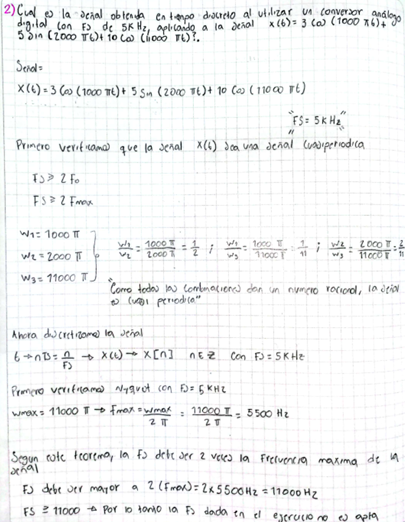

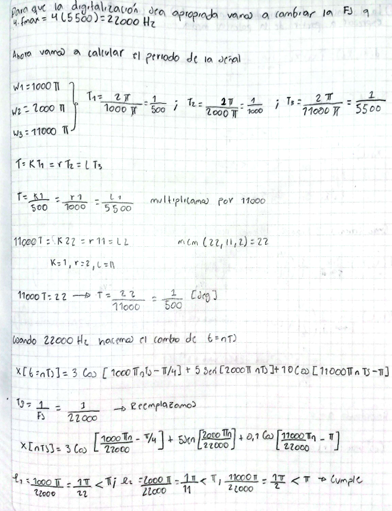

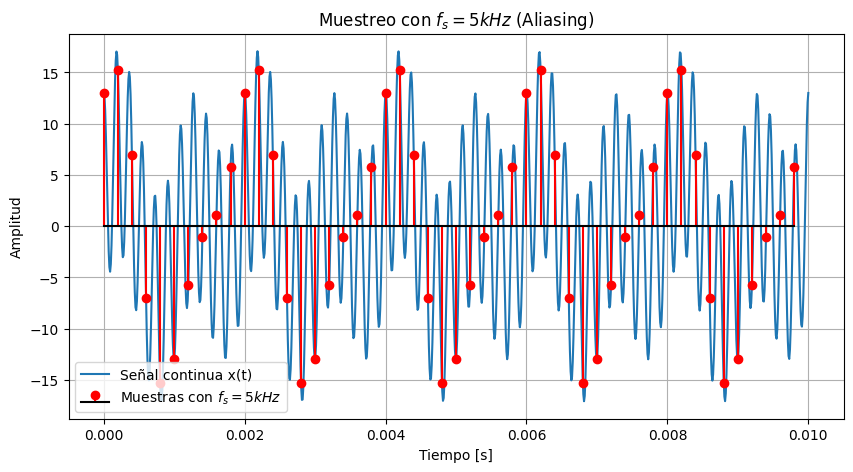

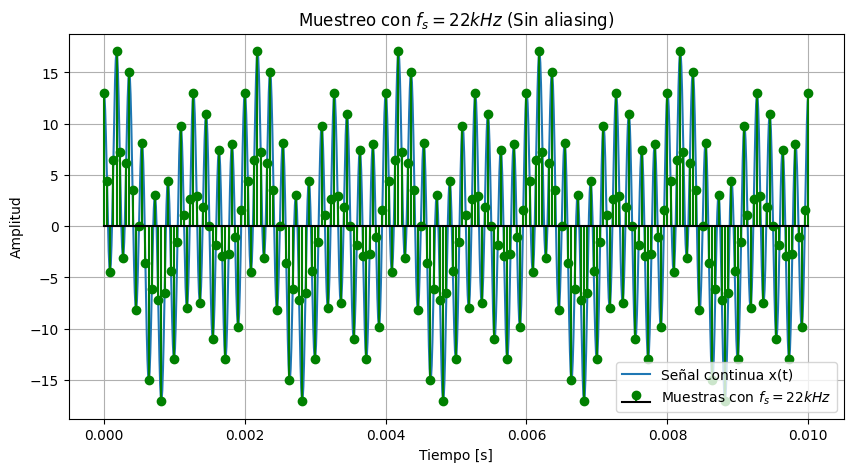

In [2]:
# Importamos las bibliotecas necesarias
import numpy as np                 # Para operaciones numéricas y creación de vectores
import matplotlib.pyplot as plt    # Para graficar

# Definimos la señal continua x(t)
# Esta señal está compuesta por:
# - una cosenoidal de 500 Hz      → 1000πt
# - una senoidal de 1000 Hz       → 2000πt
# - una cosenoidal de 5500 Hz     → 11000πt
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Creamos un vector de tiempo continuo para graficar la señal original
t_cont = np.linspace(0, 0.01, 1000)  # Desde 0 hasta 10 ms, con 1000 muestras para buena resolución

# ========================
# PRIMER CASO: fs = 5kHz
# ========================

fs1 = 5000             # Frecuencia de muestreo baja (NO cumple Nyquist)
Ts1 = 1 / fs1          # Periodo de muestreo
n1 = np.arange(0, 0.01, Ts1)  # Instantes de muestreo desde 0 hasta 10 ms
x_n1 = x(n1)           # Evaluamos la señal en esos instantes → obtenemos x[n]

# Graficamos la señal continua y sus muestras
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x(t_cont), label='Señal continua x(t)')  # Señal original
plt.stem(n1, x_n1, linefmt='r-', markerfmt='ro', basefmt='k-', label='Muestras con $f_s=5kHz$')  # Muestras
plt.title('Muestreo con $f_s=5kHz$ (Aliasing)')  # Título indicando que hay aliasing
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# ========================
# SEGUNDO CASO: fs = 22kHz
# ========================

fs2 = 22000            # Frecuencia de muestreo alta (cumple Nyquist)
Ts2 = 1 / fs2          # Periodo de muestreo
n2 = np.arange(0, 0.01, Ts2)  # Instantes de muestreo con esta frecuencia
x_n2 = x(n2)           # Obtenemos las muestras de la señal

# Graficamos la señal continua y sus muestras (sin aliasing)
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x(t_cont), label='Señal continua x(t)')  # Señal continua
plt.stem(n2, x_n2, linefmt='g-', markerfmt='go', basefmt='k-', label='Muestras con $f_s=22kHz$')  # Muestras
plt.title('Muestreo con $f_s=22kHz$ (Sin aliasing)')  # Esta frecuencia es adecuada
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


**conclusion:**
en este ejercicio podemos observar la importancia de tener una frecuencia de muestreo adecuada, ya que al tener una que sea menor del doble de la frecuencia maxima de la señal que nos dan se pierde mucha informacion.
es por esto que, como se ve en la segunda grafica, con una frecuncia de muestreo adecuada se asemeja casi totalmente a la señal original

# ejercicio 3

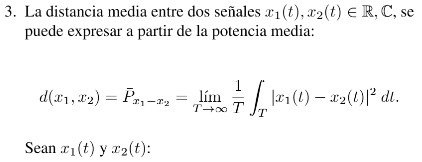

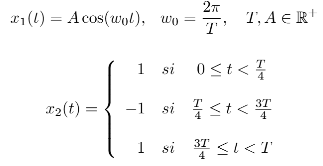


**solucion teorica:**

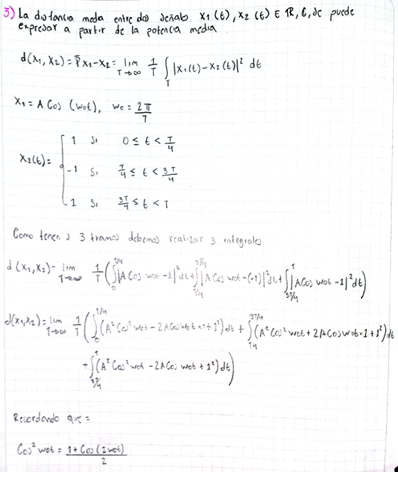

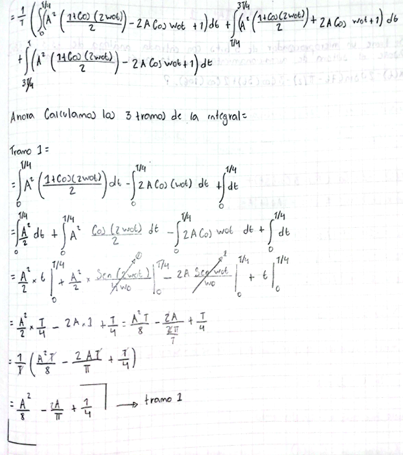

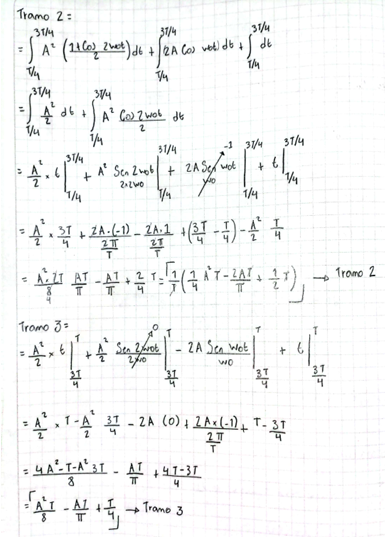

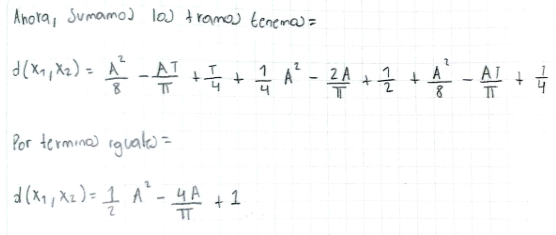

In [3]:
import sympy as sp

# Variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Frecuencia angular
w0 = 2 * sp.pi / T

# Definimos x1(t)
x1 = A * sp.cos(w0 * t)

# Definimos x2(t) por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# f(t) = |x1(t) - x2(t)|^2
f = sp.simplify((x1 - x2)**2)

# Integrar por tramos
I1 = sp.integrate((A*sp.cos(w0*t) - 1)**2, (t, 0, T/4))
I2 = sp.integrate((A*sp.cos(w0*t) + 1)**2, (t, T/4, 3*T/4))
I3 = sp.integrate((A*sp.cos(w0*t) - 1)**2, (t, 3*T/4, T))

# Sumar integrales
I_total = I1 + I2 + I3

# Dividir entre T (promedio)
d = sp.simplify(I_total / T)

# Mostrar resultado
sp.pprint(d)

 2          
A    4⋅A    
── - ─── + 1
2     π     


**discusion:**
se calcula qué tan diferente es una onda suave (coseno) de una onda cuadrada. Medimos la diferencia al cuadrado entre ellas en el tiempo y sacamos un promedio sobre un ciclo completo. Es como obtener un número que nos dice qué tanto se parecen o se distinguen. Lo hacemos simbólicamente para obtener una fórmula general.

ejercicio 4:

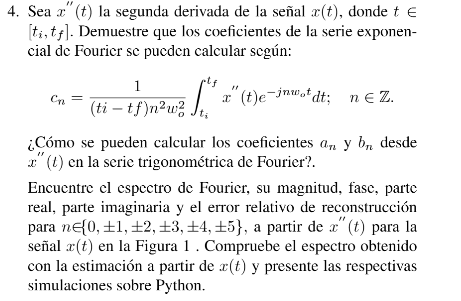

**aolucion teorica:**

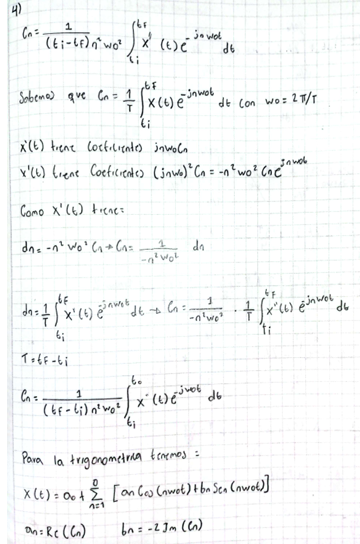

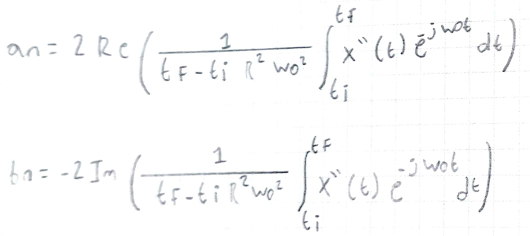

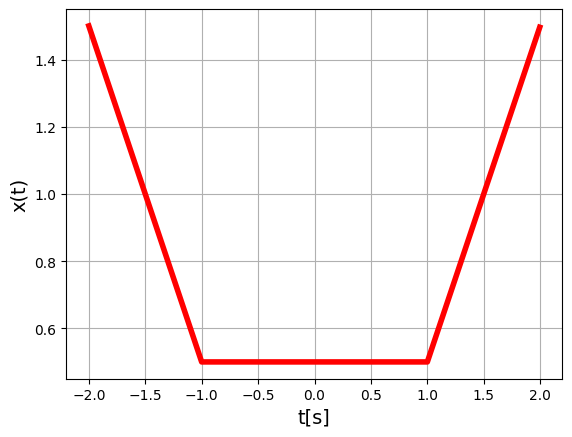

In [4]:
from ipywidgets import interact,IntSlider
import numpy as np
import matplotlib.pyplot as plt
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Un array de valores en el eje x.
    - a: Inicio de la pendiente ascendente.
    - b: Inicio de la meseta (valores altos constantes).
    - c: Fin de la meseta (valores altos constantes).
    - d: Fin de la pendiente descendente.

    Retorna:
    - Un array con los valores de la función trapezoidal en cada punto x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)+1.5



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [5]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-5-51689c077dbf>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


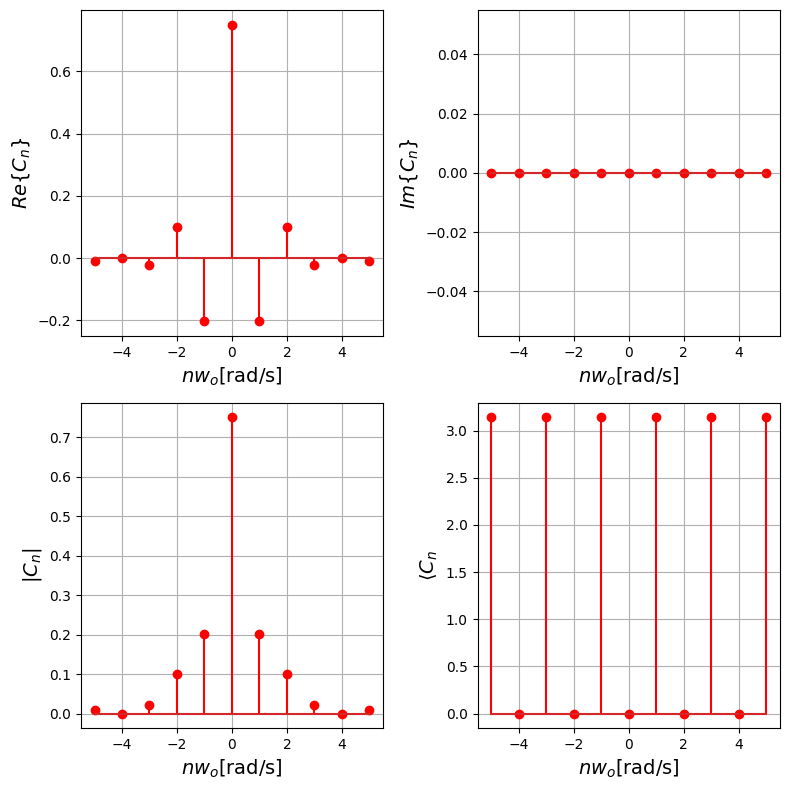

In [6]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [7]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>

**discusion:**

Este ejercicio nos demuestra cómo, incluso desde la segunda derivada de una señal, es posible recuperar su contenido de frecuencia de manera precisa, lo que es clave en procesamiento digital de señales, compresión y análisis de sistemas físicos.